# Repaso - Módulo 2
---

## Cifrado

Se recibió un mensaje cifrado con un método congruencial simple: $ x_n = (ax_{n-1}+b)\mod m $.

El cifrado que se usó es el siguiente:
- 0 corresponde a 'A'
- 1 corresponde a 'B'
- 2 corresponde a 'C'
- ...
- 25 corresponde a 'Z' (no hay 'Ñ')
- Se toma la letra y se le suma un número aleatorio desconocido.
- Se generan 3 números antes de empezar el cifrado; esto quiere decir que la primera letra es "Letra + $x_3$"
- El mensaje que llegó fue: "12, 19, 15, 24"

Sabiendo de antemano que los parámetros de este generador son $m=16$, $a=5$, $b=3$ y que la semilla fue $7$; ¿cuál es el mensaje decodificado?


## Evaluación numérica de integrales utilizando Montecarlo
Escriba la función para integrar por el método Montecarlo de tipo 1

In [39]:
import numpy as np
import sympy as sp


def f1(x):
    return np.sqrt(1+x**4)

In [44]:
def f2(x):
    return np.log(np.log(x))

In [41]:
def f3(x):
    return 1/np.log(x)

In [42]:
def f4(x):
    return np.exp(-x**2/2)

Considere las funciones $f_1(x)=\sqrt{1+x^{4}}$, $f_2(x)=\ln(\ln x)$, $f_3(x)=\frac {1}{\ln x}$, y $f_4(x)=e^{-{\frac {x^{2}}{2}}}$.

Utilizar la función anterior para realizar la evaluación numérica de las integrales de las funciones anteriores en el intervalo $(4,5)$. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.

In [31]:
a = 4
b = 5
N = np.array([10,100,1000,10000,100000])


In [47]:
import pandas as pd
N = np.logspace(1,5,5)
N

table = pd.DataFrame(columns=[], index=N)
table

""
10.0
100.0
1000.0
10000.0
100000.0


In [33]:
def montecarlo1(f, N, a, b):
    u = np.random.uniform(a, b, N)
    media = np.mean(f(u))
    return media*(b-a)


In [48]:
for i in N:
    aproximacion1 = montecarlo1(f1, int(i), a, b)
    aproximacion2 = montecarlo1(f2, int(i), a, b)
    aproximacion3 = montecarlo1(f3, int(i), a, b)
    aproximacion4 = montecarlo1(f4, int(i), a, b)
    table.loc[i, "Aproximación 1 "] = aproximacion1
    table.loc[i, "Aproximación 2 "] = aproximacion2
    table.loc[i, "Aproximación 3 "] = aproximacion3
    table.loc[i, "Aproximación 4 "] = aproximacion4
    

In [49]:
table

,Aproximación 1,Aproximación 2,Aproximación 3,Aproximación 4
10.0,20.242882,0.386094,0.665642,0.000078
100.0,20.187710,0.406274,0.667087,0.000078
1000.0,20.314832,0.407609,0.667896,0.000079
10000.0,20.381569,0.405834,0.667401,0.000079
100000.0,20.358792,0.405858,0.667065,0.000078


## Montecarlo Tipo 2
Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error de integración.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y grafíque esta región.

In [50]:
import sympy as sp
import numpy as np

def funcion(x, y):
    return (x**2 + 2*y**2)  <=  (-2*x + 8*y - 7)

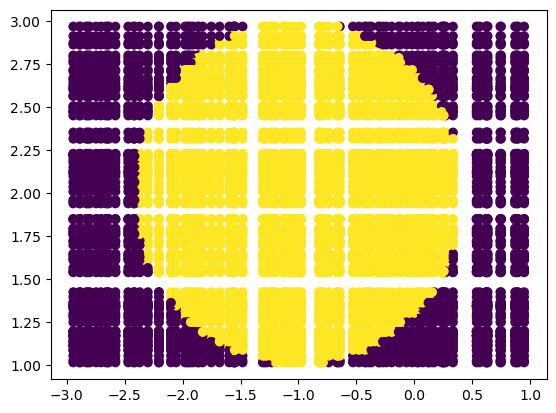

In [52]:
x = np.random.uniform(-3, 1,100)
y = np.random.uniform(1, 3, 100)

X, Y = np.meshgrid(x,y)
plt.figure()
plt.scatter(X, Y, c = funcion(X, Y))

In [56]:
def montecarlo2(region,xa, xb, ya, yb, n):
    x = np.random.uniform(xa, xb, n)
    y = np.random.uniform(ya, yb, n)
    B = region(x,y)
    AR =(xb-xa)*(yb-ya)
    return np.mean(B)*AR

n = np.logspace(1,5,5)


table2 = pd.DataFrame(columns=[], index = n)
table2

""
10.0
100.0
1000.0
10000.0
100000.0


In [57]:
a1 = -3
b1 = 1
a2 = 1
b2 = 3

AR = (b1-a1)*(b2-a2)
for i in n:
    funcion_aprox = montecarlo2(funcion, -3, 1, 1, 3, int(i))
    table2.loc[i, "Área aproximada"] = funcion_aprox
    Crel = ((1-funcion_aprox/AR)/(funcion_aprox/AR))**(1/2)
    er = np.log10(Crel) - np.log(i)/2
    table2.loc[i, "Error relativo"] = er
table2


,Área aproximada,Error relativo
10.0,4.0000,-1.151293
100.0,5.1200,-2.427524
1000.0,4.4560,-3.503603
10000.0,4.4600,-4.655336
100000.0,4.4428,-5.804737


---
## Fractal aleatorio tipo Barnsley

- En la clase de fractales aleatorios vimos que el fractal helecho de Barnsley se generaba a través de cuatro transformaciones afines que se elegían con cierta probabilidad.
- Vimos que este helecho representaba de manera muy aproximada helechos reales.
- Vimos que modificando parámetros de la tabla, se podían generar mutaciones de el helecho.

Pues bien, usando la misma idea de transformaciones afines que se escogen con cierta probabilidad, se pueden generar una infinidad inimaginable de fractales. Incluso, se pueden generar fractales aleatorios que poseen un atractor determinístico.

**Referencia:**
- Barnsley, Michael F. *Fractals Everywhere: New Edition*, ISBN: 9780486320342.

Usando la siguiente tabla, evalúe el fractal de Barnsley para 100 000 puntos.

In [59]:
import pandas as pd
import numpy as np

In [61]:
i = np.arange(4)

df = pd.DataFrame(index=i,columns=['$a_i$', '$b_i$', '$c_i$', '$d_i$', '$e_i$', '$f_i$', '$p_i$'], dtype='float')
df.index.name = "$i$"

df['$a_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$b_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$c_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$d_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$e_i$'] = [1.0, 50.0, 1.0, 50.0]
df['$f_i$'] = [1.0, 1.0, 50.0, 50.0]
df['$p_i$'] = [0.1, 0.2, 0.3, 0.4]

df.round(2)

,$a_i$,$b_i$,$c_i$,$d_i$,$e_i$,$f_i$,$p_i$
$i$,,,,,,,
0,0.5,0.0,0.0,0.5,1.0,1.0,0.1
1,0.5,0.0,0.0,0.5,50.0,1.0,0.2
2,0.5,0.0,0.0,0.5,1.0,50.0,0.3
3,0.5,0.0,0.0,0.5,50.0,50.0,0.4


In [63]:
import random

T0 = np.array([  #tranformacion o E de escalamiento
    [0.5,0],
    [0, 0.5]
])

D0 = np.array([1.0, 1.0])



T1 = np.array([  
    [0.5,0],
    [0, 0.5]
])

D1 = np.array([50, 1])



T2 = np.array([  
    [0.5,0],
    [0, 0.5]
])

D2 = np.array([1, 50])



T3 = np.array([  
    [0.5,0],
    [0, 0.5]
])

D3 = np.array([50, 50])



x = [np.array([0,0])]
T = [T0, T1, T2, T3]
D = [D0, D1, D2, D3]


for k in range(500000):                      # con ese [0] le dices que agarre más de 1 valor y los devuelva en una lista
    i = random.choices([0, 1, 2, 3], weights=df["$p_i$"])[0] 
    xkm1 = T[i] @ x[-1] + D[i]
    x.append(xkm1)

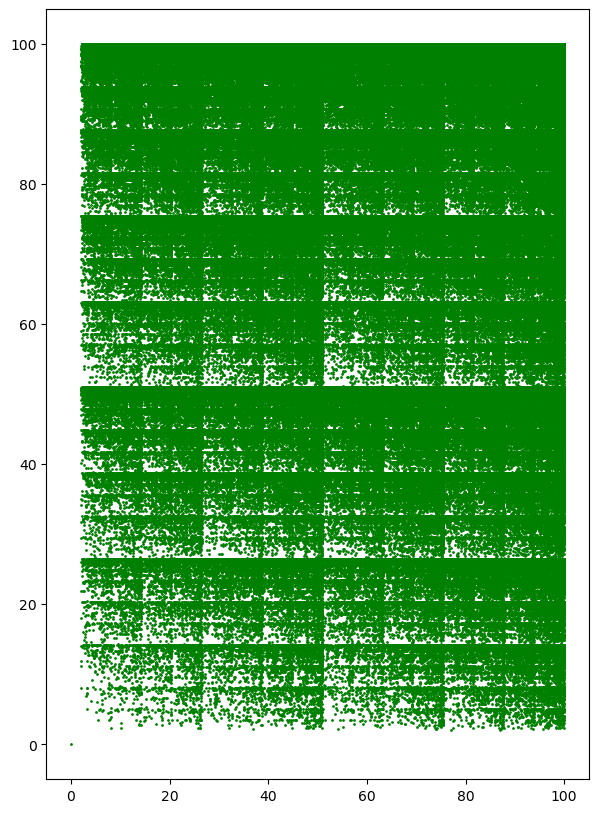

In [66]:
resultado = np.array(x)
plt.figure(figsize=(7,10))
plt.scatter(resultado[:, 0], resultado[:,1], s=1, c="g")

---
## Probabilidad Precio-Umbral

En las últimas clases vimos una aplicación de simulación montecarlo. Consistía en descargar datos históricos de precio de cierre de acciones de alguna compañía, proyectar esos precios y sacar la probabilidad de que los precios en el siguiente año sobrepasaran cierto precio umbral.

En este ejemplo evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2020 para ver si el análisis concuerda.

Descargue datos para Apple y Microsoft desde enero de 2015 a diciembre de 2019 y muestre sus gráficas.

In [24]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
data = yf.download(["AAPL", "MSFT", "2023-09-01", "2023-10-19"])
    
def getClose(name, start, end):
    return yf.download(name, start, end)["Adj Close"]

data = getClose("AAPL", "MSFT", "2023-08-01", "2023-08-31")

[*********************100%%**********************]  4 of 4 completed


2 Failed downloads:
['2023-09-01', '2023-11-18']: Exception('%ticker%: No timezone found, symbol may be delisted')


TypeError: getClose() takes 0 positional arguments but 4 were given

Calcule los rendimientos diarios junto con sus características estadísticas

Simule 1000 escenarios de rendimientos diarios para el 2020 (para cada una de las empresas)

Calcule los precios con base en los rendimientos simulados

Calcule la probabilidad de obtener un retorno del 20% para ambas marcas.

Finalmente, grafique los datos reales del 2020 para ver que tan acertado fue nuestro análisis.

## Probabilidad

Imagina que en un país la estatura promedio es 164 centímetros, con una desviación estándar de 4 centímetros. ¿Cuál es la probabilidad de que si sumamos la estatura de 20 personas se obtenga un valor mayor a 30 metros?